In [1]:
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install lxml


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df_spurs = pd.read_html("spurs.html")[0].dropna(subset=['Age']).drop(columns=['Nat.'])

In [4]:
df_spurs['Player'] = df_spurs['Player'].str.replace('Defensive Midfield', 'Defensive-Midfield')
df_spurs['Player'] = df_spurs['Player'].str.replace('Central Midfield', 'Central-Midfield')
df_spurs['Player'] = df_spurs['Player'].str.replace('Attacking Midfield', 'Attacking-Midfield')
df_spurs['Player'] = df_spurs['Player'].str.replace('Left Winger', 'Left-Winger')
df_spurs['Player'] = df_spurs['Player'].str.replace('Right Winger', 'Right-Winger')

In [5]:
# Function to calculate x based on the number of words
def calculate_x(row):
    words = row['Player'].split()
    return len(words)

# Calculate x for each row
df_spurs['x'] = df_spurs.apply(calculate_x, axis=1)

In [6]:
# Function to split the string based on the value of x
def split_string(row):
    s = row['Player']
    x = row['x']
    words = s.split()
    if len(words) > x:
        first_x_words = ' '.join(words[:x])
        last_word = '-'.join(words[x:])
    else:
        first_x_words = ' '.join(words[:-1])
        last_word = words[-1] if words else ''
    return pd.Series([first_x_words, last_word])

# Apply the function to the DataFrame
df_spurs[['Name', 'Position']] = df_spurs.apply(split_string, axis=1)

In [7]:
df_spurs = df_spurs.reset_index(drop=True)

In [8]:
df_spurs.to_csv("data.csv", index=False)

In [9]:
df_spurs = pd.read_csv("data_manual_modify.csv")

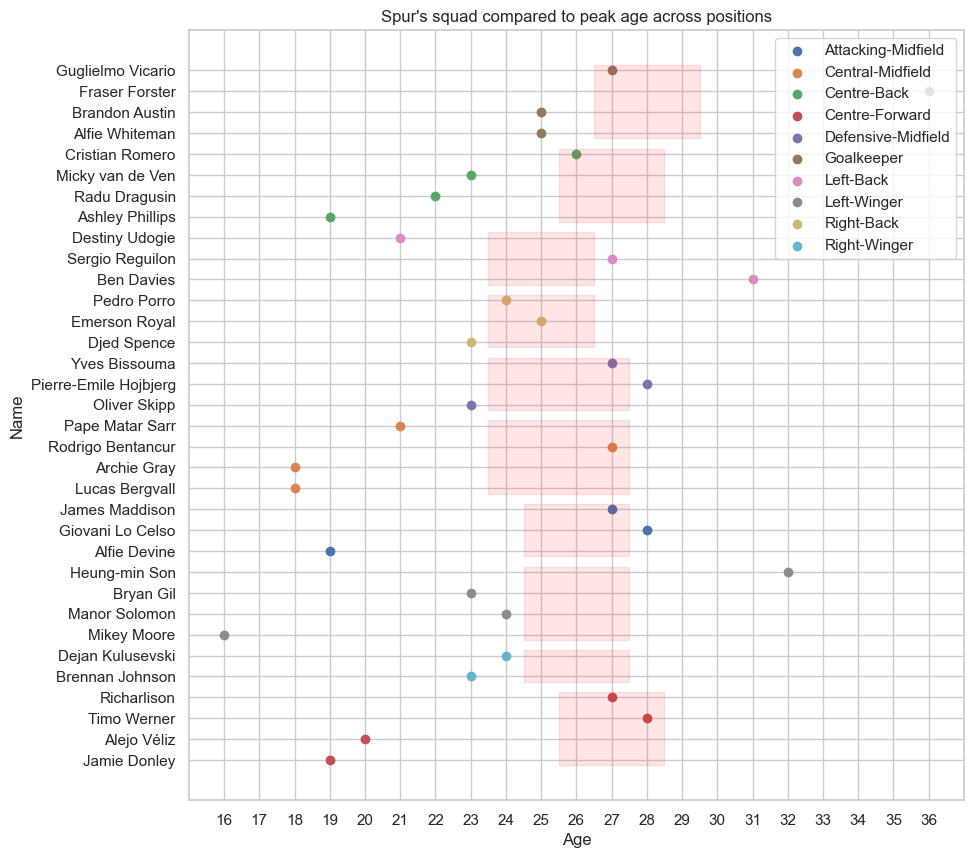

In [10]:
# Create DataFrame
df = df_spurs

# Define peak age ranges for each position
peak_age_ranges = {
    'Goalkeeper': (26.5, 29.5),
    'Centre-Back': (25.5, 28.5),
    'Left-Back': (23.5, 26.5),
    'Right-Back': (23.5, 26.5),
    'Defensive-Midfield': (23.5, 27.5),
    'Central-Midfield': (23.5, 27.5),
    'Attacking-Midfield': (24.5, 27.5),
    'Left-Winger': (24.5, 27.5),
    'Right-Winger': (24.5, 27.5),
    'Centre-Forward': (25.5, 28.5)
}

# Plot settings
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")

# Adjust y positions to add padding
y_positions = np.arange(len(df)) + 0.5

# Plot the players' ages with adjusted y positions
for i, (position, group) in enumerate(df.groupby('Position')):
    idx = group.index
    y_vals = y_positions[idx]
    plt.scatter(group['Age'], y_vals, label=position)
    
    # Add peak age ranges with padding
    start, end = peak_age_ranges[position]
    plt.fill_betweenx([y_vals.min() - 0.25, y_vals.max() + 0.25], start, end, alpha=0.1, color='red')

# Determine x-axis limits and ticks dynamically based on data
age_min = df['Age'].min()
age_max = df['Age'].max()
age_range = age_max - age_min
age_padding = 1  # Padding on both sides

plt.xlim(age_min - age_padding, age_max + age_padding)
plt.xticks(np.arange(int(age_min), int(age_max) + 1, 1))

# Add labels and title
plt.yticks(y_positions, df['Name'])
plt.xlabel('Age')
plt.ylabel('Name')
plt.title('Spur\'s squad compared to peak age across positions')
plt.legend(loc='upper right')

# Show plot
plt.gca().invert_yaxis()
plt.show()